# Problem Statement

### Using Iris data cluster Iris flowers into different clusters based on similarity.

# Import basic Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

# Load Data

In [15]:
data= pd.read_csv('Iris.csv')

In [16]:
data

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2



# Domain Analysis

In [21]:
data.columns

Index(['Unnamed: 0', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'target'],
      dtype='object')

1. sepal_length

Type: Numerical (continuous)

Description: Length of the sepal (flower leaf) measured in centimeters.

Domain Insight: Larger values usually indicate bigger outer boundaries of the flower. Sepal length varies across species, especially between setosa and the other two species.

2. sepal_width

Type: Numerical (continuous)

Description: Width of the sepal measured in centimeters.

Domain Insight: Setosa flowers generally have a higher sepal width compared to versicolor and virginica. Helps separate species with overlapping sepal length.

3. petal_length

Type: Numerical (continuous)

Description: Length of the petal measured in centimeters.

Domain Insight: One of the most important features for classification. Setosa has very small petal lengths, while virginica has the largest. Strongly discriminative.

4. petal_width

Type: Numerical (continuous)

Description: Width of the petal measured in centimeters.

Domain Insight: Similar to petal length, it is highly different across species. Used heavily by ML models for accurate classification.

5. target

Type: Categorical (nominal)

Description: This is the flower species label. Usually encoded as:

0 → Iris-setosa

1 → Iris-versicolor

2 → Iris-virginica

Domain Insight: This is the output variable used for supervised classification.

In [24]:
data1= sbn.load_dataset('Iris')

In [25]:
data1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [26]:
data1['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [29]:
data['target'].unique()

array([0, 1, 2], dtype=int64)

# Basic Check

In [31]:
data.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [32]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [33]:
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [34]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [35]:
data.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
target          1.000000
dtype: float64

In [36]:
data.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
target          1.00
dtype: float64

In [37]:
data.mode()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.0,3.0,1.5,0.2,0
1,NaN,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,2


In [38]:
data.var()

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
target          0.671141
dtype: float64

In [39]:
data.std()

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
target          0.819232
dtype: float64

In [40]:
data.cov()

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,0.685694,-0.039268,1.273682,0.516904,0.530872
sepal_width,-0.039268,0.188004,-0.321713,-0.117981,-0.148993
petal_length,1.273682,-0.321713,3.113179,1.296387,1.371812
petal_width,0.516904,-0.117981,1.296387,0.582414,0.597987
target,0.530872,-0.148993,1.371812,0.597987,0.671141


In [41]:

data.corr()

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


In [43]:
data.kurt()

sepal_length   -0.552064
sepal_width     0.290781
petal_length   -1.401921
petal_width    -1.339754
target         -1.510135
dtype: float64

In [44]:
data.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
target          0.000000
dtype: float64

In [45]:
data.quantile(0.25)

sepal_length    5.1
sepal_width     2.8
petal_length    1.6
petal_width     0.3
target          0.0
Name: 0.25, dtype: float64

In [49]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [57]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [53]:

data.shape

(150, 5)

In [55]:
data.size

750

In [58]:
data.target.unique()

array([0, 1, 2], dtype=int64)

# EDA

<Axes: xlabel='petal_length', ylabel='petal_width'>

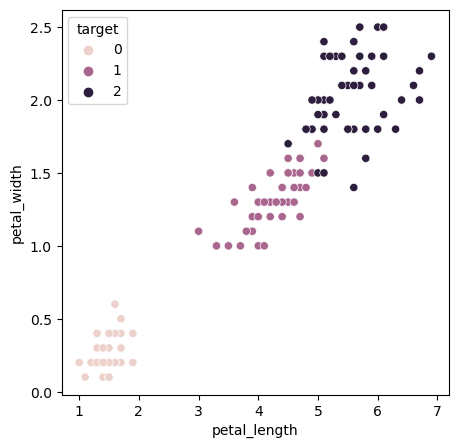

In [62]:
# EDA
plt.figure(figsize=(5,5))
sbn.scatterplot(data=data,x='petal_length',y='petal_width',hue='target')

# Data Preprocessing

In [65]:
# cheching missing value
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [66]:
data.isnull().sum()/len(data)*100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
target          0.0
dtype: float64

In [67]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [68]:
data.duplicated().sum()

3

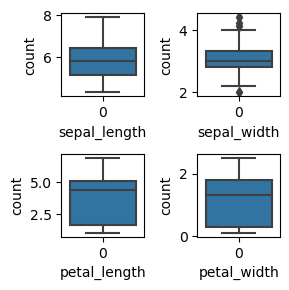

In [70]:
# Check for outliers
plt.figure(figsize=(3,3))
plotnumber=1

for column in data.drop('target',axis=1):
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sbn.boxplot(data[column])
        plt.xlabel(column)
        plt.ylabel("count")
    plotnumber+=1
plt.tight_layout()

In [71]:
# we see outliers in sepal_width.
# First check distribbution if its normal go with 3 sigma rule or else go with IQR

<Axes: xlabel='sepal_width', ylabel='Count'>

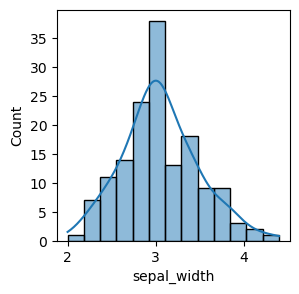

In [74]:
plt.figure(figsize=(3,3))
sbn.histplot(data=data,x='sepal_width', kde=True)

* Clearly we see outliers in sepal_width columns and distribution of sepalwidth is 
normal will use 3-sigma rule to identify the outliers.
* Replace outliers with mean since data is normal.

In [76]:
# 3-sigma rule
low_limit=data['sepal_width'].mean()-3*data['sepal_width'].std()
upper_limit=data['sepal_width'].mean()+3*data['sepal_width'].std()
print("lower limit",low_limit)
print("upper limit",upper_limit)

lower limit 1.7532170659134791
upper limit 4.354782934086521


In [77]:
# Find values less than lower limit
data.loc[data['sepal_width']<low_limit]

,sepal_length,sepal_width,petal_length,petal_width,target


In [78]:
# Find values greater than upper limit
data.loc[data['sepal_width']>upper_limit]

,sepal_length,sepal_width,petal_length,petal_width,target
15,5.7,4.4,1.5,0.4,0


In [79]:
# replace outlier with mean
data.loc[data['sepal_width']>upper_limit,'sepal_width']=data['sepal_width'].mean()

<Axes: xlabel='sepal_width'>

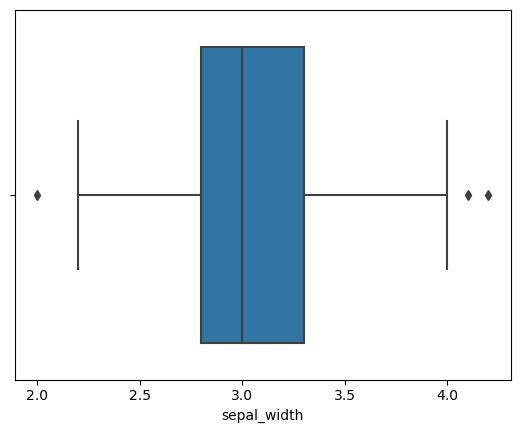

In [80]:
sbn.boxplot(data=data,x='sepal_width')

# Scaling

In [82]:

from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
data.iloc[:,:-1]=scaling.fit_transform(data.iloc[:,:-1])

In [85]:
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.900681,1.088864,-1.341272,-1.312977,0
1,-1.143017,-0.107760,-1.341272,-1.312977,0
2,-1.385353,0.370890,-1.398138,-1.312977,0
3,-1.506521,0.131565,-1.284407,-1.312977,0
4,-1.021849,1.328189,-1.341272,-1.312977,0
...,...,...,...,...,...
145,1.038005,-0.107760,0.819624,1.447956,2
146,0.553333,-1.304384,0.705893,0.922064,2
147,0.795669,-0.107760,0.819624,1.053537,2
148,0.432165,0.849539,0.933356,1.447956,2


<Axes: xlabel='sepal_width'>

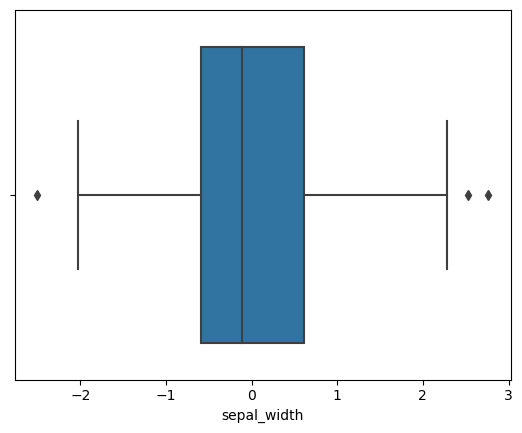

In [84]:
sbn.boxplot(data=data,x='sepal_width')

# Feture Engineering

In [91]:
data.to_csv('CleanedData.csv', index=False)

# ______________________________________________________

In [88]:
# split data in x variable 
x= data.drop('target', axis=1)

In [89]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.088864,-1.341272,-1.312977
1,-1.143017,-0.107760,-1.341272,-1.312977
2,-1.385353,0.370890,-1.398138,-1.312977
3,-1.506521,0.131565,-1.284407,-1.312977
4,-1.021849,1.328189,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.107760,0.819624,1.447956
146,0.553333,-1.304384,0.705893,0.922064
147,0.795669,-0.107760,0.819624,1.053537
148,0.432165,0.849539,0.933356,1.447956


# Model Building

### Apply K-Means algorithm/ Model

In [96]:
# import k-means model
from sklearn.cluster import KMeans


In [100]:
# initialize the model
model=KMeans(n_clusters=6, random_state=2)

In [101]:
# train The model
model.fit(x)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=2)

In [102]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.088864,-1.341272,-1.312977
1,-1.143017,-0.107760,-1.341272,-1.312977
2,-1.385353,0.370890,-1.398138,-1.312977
3,-1.506521,0.131565,-1.284407,-1.312977
4,-1.021849,1.328189,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.107760,0.819624,1.447956
146,0.553333,-1.304384,0.705893,0.922064
147,0.795669,-0.107760,0.819624,1.053537
148,0.432165,0.849539,0.933356,1.447956


In [104]:
# centroids-cluster centers
# no of clusters is sames as number of centroids
model.cluster_centers_

array([[-3.64080601e-01, -1.44114126e+00,  1.07449102e-01,
         1.75297293e-03],
       [ 1.85925366e+00, -4.80043087e-01,  1.41355503e+00,
         1.03892863e+00],
       [-7.56211786e-01,  1.45705628e+00, -1.29752956e+00,
        -1.21690033e+00],
       [ 1.10585876e+00,  4.57046629e-01,  1.01751700e+00,
         1.19552754e+00],
       [-1.29447675e+00,  1.46921521e-01, -1.31283955e+00,
        -1.29654261e+00],
       [ 3.10997534e-01, -4.05586469e-01,  5.51723697e-01,
         5.21801610e-01]])

model._lables_

In [107]:
model.labels_

array([2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 4, 3, 5, 3, 0, 5, 5, 3, 0, 5, 0, 0, 5, 0, 5, 5, 5,
       5, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 5, 5, 5, 5, 0,
       5, 0, 0, 5, 0, 0, 0, 5, 5, 5, 0, 5, 3, 5, 1, 5, 3, 1, 0, 1, 1, 3,
       3, 5, 3, 5, 5, 3, 3, 3, 1, 0, 3, 5, 1, 5, 3, 3, 5, 5, 5, 1, 1, 3,
       5, 5, 5, 1, 3, 3, 5, 3, 3, 3, 5, 3, 3, 3, 5, 3, 3, 5])

In [108]:
model.cluster_centers_

array([[-3.64080601e-01, -1.44114126e+00,  1.07449102e-01,
         1.75297293e-03],
       [ 1.85925366e+00, -4.80043087e-01,  1.41355503e+00,
         1.03892863e+00],
       [-7.56211786e-01,  1.45705628e+00, -1.29752956e+00,
        -1.21690033e+00],
       [ 1.10585876e+00,  4.57046629e-01,  1.01751700e+00,
         1.19552754e+00],
       [-1.29447675e+00,  1.46921521e-01, -1.31283955e+00,
        -1.29654261e+00],
       [ 3.10997534e-01, -4.05586469e-01,  5.51723697e-01,
         5.21801610e-01]])

In [110]:

model.labels_

array([2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 4, 3, 5, 3, 0, 5, 5, 3, 0, 5, 0, 0, 5, 0, 5, 5, 5,
       5, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 5, 5, 5, 5, 0,
       5, 0, 0, 5, 0, 0, 0, 5, 5, 5, 0, 5, 3, 5, 1, 5, 3, 1, 0, 1, 1, 3,
       3, 5, 3, 5, 5, 3, 3, 3, 1, 0, 3, 5, 1, 5, 3, 3, 5, 5, 5, 1, 1, 3,
       5, 5, 5, 1, 3, 3, 5, 3, 3, 3, 5, 3, 3, 3, 5, 3, 3, 5])

In [111]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.088864,-1.341272,-1.312977
1,-1.143017,-0.107760,-1.341272,-1.312977
2,-1.385353,0.370890,-1.398138,-1.312977
3,-1.506521,0.131565,-1.284407,-1.312977
4,-1.021849,1.328189,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.107760,0.819624,1.447956
146,0.553333,-1.304384,0.705893,0.922064
147,0.795669,-0.107760,0.819624,1.053537
148,0.432165,0.849539,0.933356,1.447956


In [114]:
plt.figure(figsize=(3,3))
sbn..scatter(data=x x='petal_length',x='petal_width')

SyntaxError: invalid syntax (563106849.py, line 2)

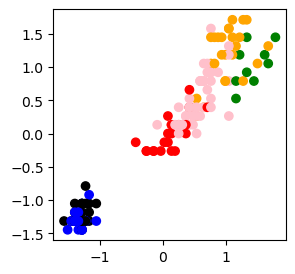

In [115]:
# Visualize the clusters created by model
plt.figure(figsize=(3,3))
color_schema=np.array(["red","green","black","orange","blue","pink"])
plt.scatter(x.petal_length,x.petal_width,color=color_schema[model.labels_])

In [117]:
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.900681,1.088864,-1.341272,-1.312977,0
1,-1.143017,-0.107760,-1.341272,-1.312977,0
2,-1.385353,0.370890,-1.398138,-1.312977,0
3,-1.506521,0.131565,-1.284407,-1.312977,0
4,-1.021849,1.328189,-1.341272,-1.312977,0
...,...,...,...,...,...
145,1.038005,-0.107760,0.819624,1.447956,2
146,0.553333,-1.304384,0.705893,0.922064,2
147,0.795669,-0.107760,0.819624,1.053537,2
148,0.432165,0.849539,0.933356,1.447956,2


In [118]:
data['Labels']=pd.DataFrame(model.labels_)

In [119]:

data

,sepal_length,sepal_width,petal_length,petal_width,target,Labels
0,-0.900681,1.088864,-1.341272,-1.312977,0,2
1,-1.143017,-0.107760,-1.341272,-1.312977,0,4
2,-1.385353,0.370890,-1.398138,-1.312977,0,4
3,-1.506521,0.131565,-1.284407,-1.312977,0,4
4,-1.021849,1.328189,-1.341272,-1.312977,0,2
...,...,...,...,...,...,...
145,1.038005,-0.107760,0.819624,1.447956,2,3
146,0.553333,-1.304384,0.705893,0.922064,2,5
147,0.795669,-0.107760,0.819624,1.053537,2,3
148,0.432165,0.849539,0.933356,1.447956,2,3


In [120]:
data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,Labels
0,-0.900681,1.088864,-1.341272,-1.312977,0,2
1,-1.143017,-0.107760,-1.341272,-1.312977,0,4
2,-1.385353,0.370890,-1.398138,-1.312977,0,4


In [121]:
data.tail(7)

,sepal_length,sepal_width,petal_length,petal_width,target,Labels
143,1.159173,0.370890,1.217684,1.447956,2,3
144,1.038005,0.610215,1.103953,1.710902,2,3
145,1.038005,-0.107760,0.819624,1.447956,2,3
146,0.553333,-1.304384,0.705893,0.922064,2,5
147,0.795669,-0.107760,0.819624,1.053537,2,3
148,0.432165,0.849539,0.933356,1.447956,2,3
149,0.068662,-0.107760,0.762759,0.790591,2,5


# Model Evaluation

In [126]:
# impoting lib
from sklearn.metrics import silhouette_score
silhouette_score(x,model.labels_)

0.3390874797019207

### We see overlapping of clusters because number of clusters that we have choosen might be wrong

# How to  find optimal value for K?
Elbow Method

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

Text(0, 0.5, 'WCSS')

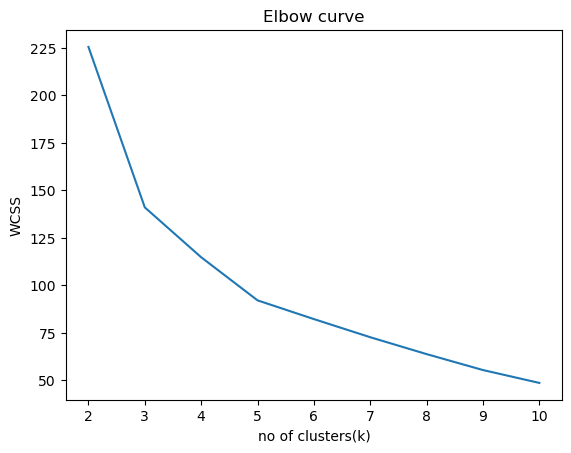

In [129]:
WCSS=[]
for i in range(2,11):
    model=KMeans(n_clusters=i,random_state=20)
    model.fit(x)
    WCSS.append(model.inertia_)
plt.plot(range(2,11),WCSS)
plt.title('Elbow curve')
plt.xlabel('no of clusters(k)')
plt.ylabel('WCSS')
    

In [131]:
WCSS

[225.50046206211442,
 141.06688377407846,
 114.82880681387994,
 92.15342859045302,
 82.29541504498772,
 72.74855093311186,
 63.86535212246592,
 55.48098553300095,
 48.709326122664]

In [132]:
# Clearly from elbow method the optimal value for k is 3

In [134]:
model=KMeans(n_clusters=3,random_state=10)
model.fit(x)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=10)

In [135]:
model.cluster_centers_

array([[-0.01725724, -0.8953563 ,  0.37193617,  0.3029456 ],
       [ 1.14840215,  0.17411148,  0.99527619,  1.02432052],
       [-1.01457897,  0.82819159, -1.30487835, -1.25512862]])

In [136]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [137]:
data['labels2']=pd.DataFrame(model.labels_)

In [139]:
data.to_csv('AfterModel_and_ElbowWCSS', index=1)

In [140]:
data.to_csv('AfterModel_and_ElbowWCSS.csv', index=False)

### Model Evaluation

In [147]:
from sklearn.metrics import silhouette_score

In [148]:
silhouette_score(x,model.labels_)

0.461588416586402